In [2]:
%load_ext autoreload
%autoreload 2

- [Element Picker](#Element-Picker)
- [Gaussian Smoothing Picker](#Gaussian-Smoothing-Picker)
- [Von Mises](#Von-Mises-Stress-Condition)
- [Von Mises Result](#Von-Mises-Result)
- [Circle](#Circle-Stress-Condition)
- [Circle Result](#Circle-Result)

In [3]:
import struct_opt.material_opt as material_opt
import struct_opt.visual as visual
from struct_opt.environment_setup import get_element_index_matrix

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt


Element Picker
---

elements are indexed in the following manner

| 1 | 5 | 9  | 13 |
|---|---|----|----|
| 2 | 6 | 10 | 14 |
| 3 | 7 | 11 | 15 |
| 4 | 8 | 12 | 16 |

visualize elements using function below

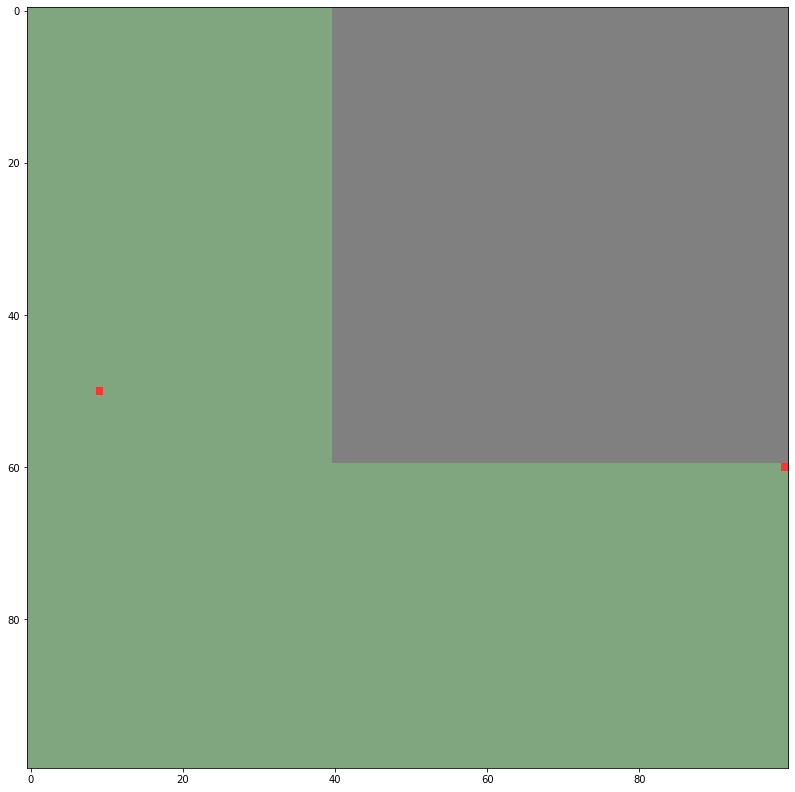

In [6]:
problem_size = 20

elements = [16 * np.square(problem_size) - problem_size * 2, 950]
element_index_matrix = get_element_index_matrix(problem_size)


visual.highlight_elements(element_index_matrix, elements)

Gaussian Smoothing Picker
---

Use this to check how the mass is spread out for different value of the variance and width of some element

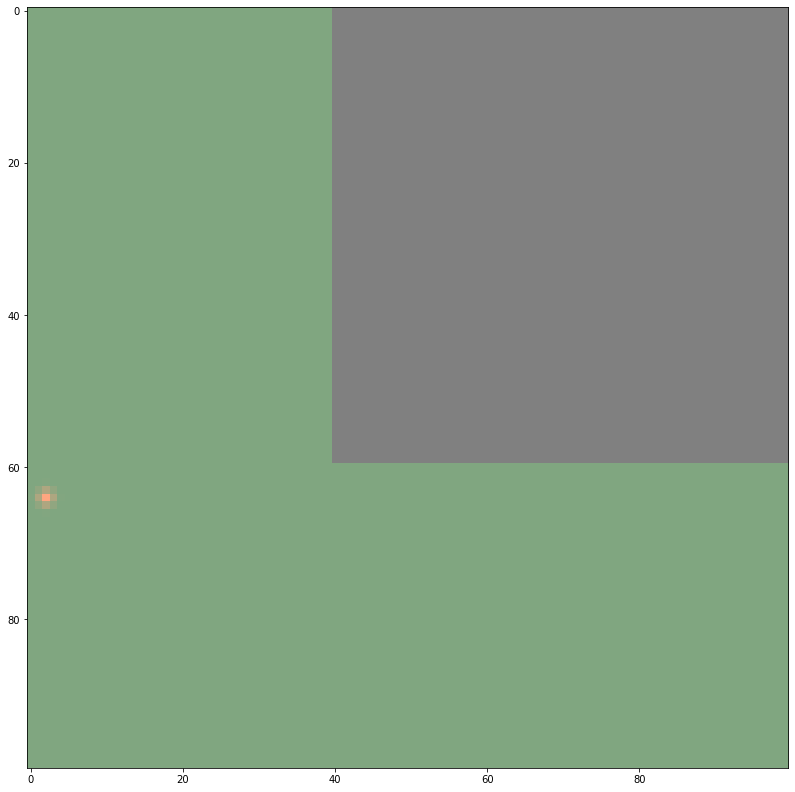

In [7]:
visual.highlight_gaussian_smoothing(element_index_matrix, element=264, variance=1.0, width=3.0)

Von Mises Stress Condition
---

In [3]:
problem_size = 20
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2
    ]),
    directions=np.array([
        1
    ]),
    amplitudes=np.array([
        -1
    ]),
    max_constraint=6000,
    
    mode="von mises",
    
    smoothing_mode="gaussian", #gaussian or none
    smoothing_width=3.0,
    variance=0.5,
    
    penalty_mode="entropy", # entropy or none
    penalty_epochs=40, # Last x epochs uses penalty
    penalty_size=2.0,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=2000,
    barrier_width=4000,
    
    epochs=100,
    learning_rate=0.15,
    
    data_directory="data"
)


Initializing env: 0.31807494163513184 seconds
0: O: 3549.24951171875 W: 5637.1005859375 C 4319.31005859375 -- T: 3.1542234420776367
1: O: 3432.01806640625 W: 5535.8359375 C 4273.77685546875 -- T: 2.9758379459381104
2: O: 3289.372802734375 W: 5422.14208984375 C 4190.28271484375 -- T: 2.9745333194732666
3: O: 3142.544921875 W: 5295.142578125 C 4132.3984375 -- T: 2.9708290100097656
4: O: 3032.7587890625 W: 5155.80419921875 C 4218.4609375 -- T: 2.974318265914917
5: O: 2858.0322265625 W: 5004.0654296875 C 4151.625 -- T: 2.9973955154418945
6: O: 2670.120849609375 W: 4838.7431640625 C 4085.1962890625 -- T: 2.995551586151123
7: O: 2484.381103515625 W: 4660.2197265625 C 4063.815185546875 -- T: 2.9970433712005615
8: O: 2291.371337890625 W: 4468.724609375 C 4059.318359375 -- T: 2.9780240058898926
9: O: 2083.404541015625 W: 4264.4755859375 C 4048.265869140625 -- T: 2.986417531967163
10: O: 1868.677734375 W: 4048.81591796875 C 4051.041259765625 -- T: 2.983427047729492
11: O: 1636.97998046875 W: 382

95: O: 4869.4228515625 W: 1952.083984375 C 7088.5478515625 -- T: 2.97989559173584
96: O: 4872.93505859375 W: 1960.295166015625 C 7111.2509765625 -- T: 2.9996182918548584
97: O: 4767.77392578125 W: 1969.142333984375 C 6969.2470703125 -- T: 2.989009380340576
98: O: 4733.876953125 W: 1978.54833984375 C 6930.0400390625 -- T: 2.9855759143829346
99: O: 4781.77783203125 W: 1987.46142578125 C 7016.8994140625 -- T: 2.995624542236328
Time to run optimization 100 epochs: 299.47435998916626 seconds


Von Mises Result
---

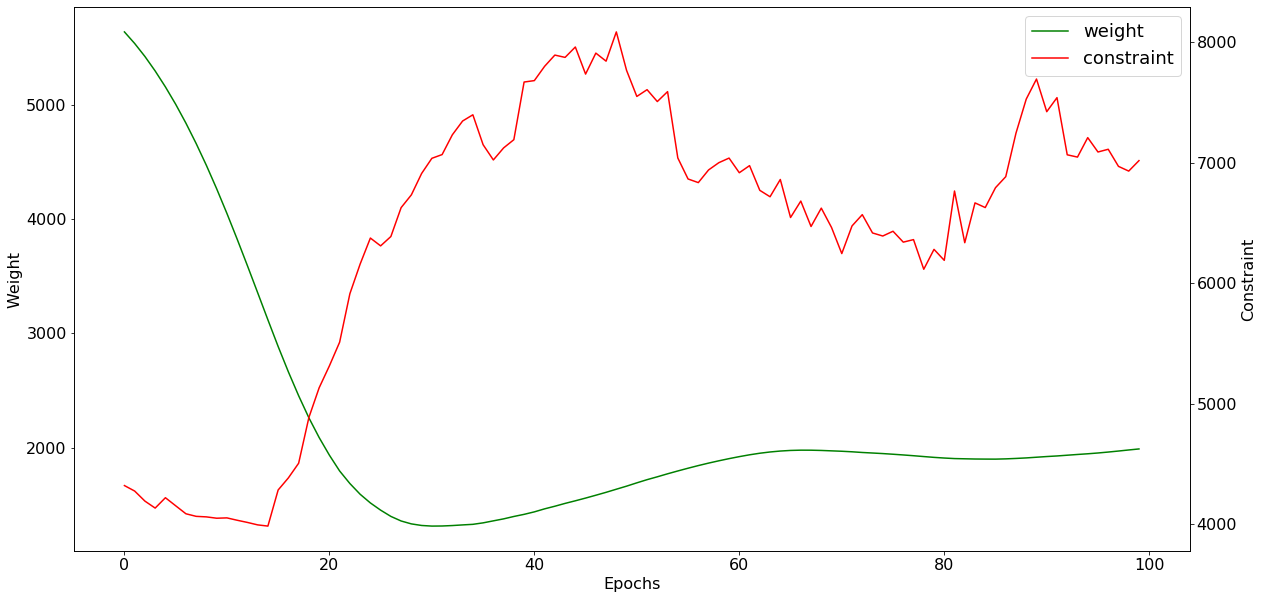

In [4]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

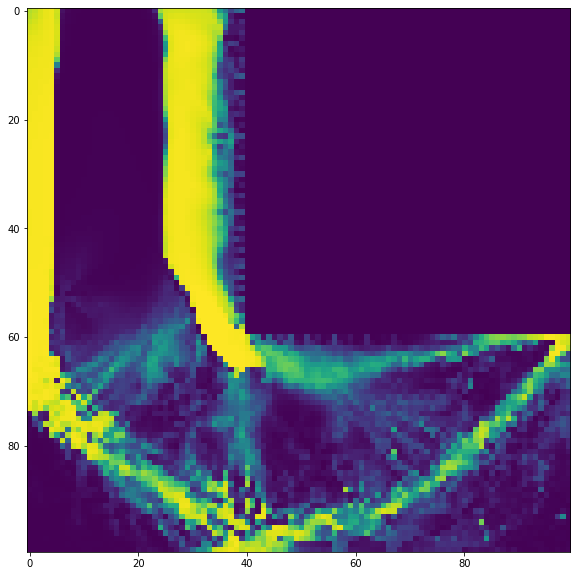

In [5]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())

Circle Stress Condition
---

In [5]:
problem_size = 20
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2, 225
    ]),
    directions=np.array([
        1,
        1
    ]),
    amplitudes=np.array([
        -1,
        -1
    ]),
    max_constraint=25000,
    
    mode="circle",
    
    smoothing_mode="gaussian",
    smoothing_width=3.0,
    variance=1.0,
    
    penalty_mode="entropy", # entropy or none
    penalty_epochs=50, # Last x epochs uses penalty
    penalty_size=2.0,
    
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=2000,
    barrier_width=6000,
    
    epochs=100,
    learning_rate=0.15,
    
    phis=[0.0, 0.5],
    kf=0.3,
    
    data_directory="data"
)


Initializing env: 0.33126378059387207 seconds
0: O: 4310.6181640625 W: 5637.1005859375 C 21117.853515625 -- T: 3.2275702953338623
1: O: 4189.91455078125 W: 5613.92724609375 C 20923.84765625 -- T: 3.024904251098633
2: O: 4059.88720703125 W: 5579.4462890625 C 20724.390625 -- T: 3.0144009590148926
3: O: 3950.121826171875 W: 5534.9892578125 C 20582.46875 -- T: 3.027972459793091
4: O: 3843.663330078125 W: 5480.42041015625 C 20466.357421875 -- T: 2.9994640350341797
5: O: 3747.814453125 W: 5415.44580078125 C 20395.828125 -- T: 3.0121729373931885
6: O: 3641.263427734375 W: 5340.2978515625 C 20322.96484375 -- T: 3.019193172454834
7: O: 3546.1123046875 W: 5255.955078125 C 20297.62109375 -- T: 3.017050266265869
8: O: 3455.5859375 W: 5163.26953125 C 20302.6953125 -- T: 3.0308449268341064
9: O: 3356.14111328125 W: 5062.57177734375 C 20305.63671875 -- T: 3.01461124420166
10: O: 3264.0771484375 W: 4955.3759765625 C 20341.01953125 -- T: 3.031402349472046
11: O: 3173.87890625 W: 4843.970703125 C 20390.

97: O: 1827.87158203125 W: 3376.445068359375 C 18986.55859375 -- T: 3.0051355361938477
98: O: 1818.43310546875 W: 3376.628662109375 C 18982.171875 -- T: 3.027237892150879
99: O: 1808.02978515625 W: 3376.548828125 C 18977.12890625 -- T: 3.0147879123687744
Time to run optimization 100 epochs: 302.5609884262085 seconds


Circle Result
---

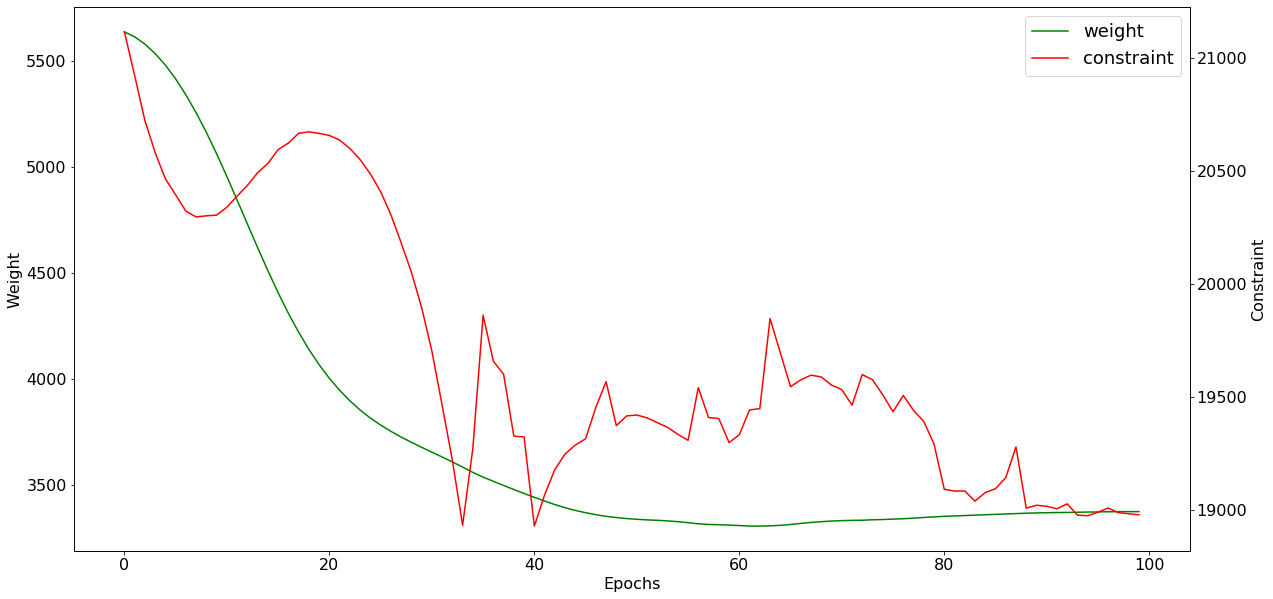

In [6]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

In [ ]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())